1.  https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data - выбранный датасет для рассмотрения

2. Этот набор данных обеспечивает всесторонний анализ моделей использования мобильных устройств и классификацию поведения пользователей. Он содержит 700 образцов пользовательских данных, включая такие показатели, как время использования приложений, время включения экрана, разрядка батареи и потребление данных. Каждая запись относится к одному из пяти классов поведения пользователей, от легкого до экстремального использования, что позволяет проводить глубокий анализ и моделирование.

Ключевые функции:

User ID: Уникальный идентификатор для каждого пользователя.


Модель устройства: Модель смартфона пользователя.


Операционная система: Операционная система устройства (iOS или Android).


Время использования приложения: Ежедневное время, затрачиваемое на использование мобильных приложений, измеряется в минутах.


Время работы экрана: Среднее количество часов в день, когда экран активен.


Разряд батареи: Ежедневный расход батареи в мАч.


Количество установленных приложений: Общее количество приложений, доступных на устройстве.


Использование данных: Ежедневное потребление мобильных данных в мегабайтах.


Возраст: Возраст пользователя.


Пол: Пол пользователя (мужчины или женщины).


Класс поведения пользователя: Классификация поведения пользователя в зависимости от степени использования.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

dframe = pd.read_csv('user_behavior_dataset.csv') # прочитаем датасет

print(dframe.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

Откинем лишние столбцы, в которых в моем датасете находятся строчные значения, а затем через метод конкатенации объединим все средние значения и средние квадратические отклонения для всех столбцов.

In [8]:

input_data = dframe.drop(dframe.columns[[1, 2, 9]], axis=1) 

print(pd.concat([input_data.mean(), input_data.std()], axis=1, keys=['mean', 'deviate']))

                                   mean     deviate
User ID                      350.500000  202.216880
App Usage Time (min/day)     271.128571  177.199484
Screen On Time (hours/day)     5.272714    3.068584
Battery Drain (mAh/day)     1525.158571  819.136414
Number of Apps Installed      50.681429   26.943324
Data Usage (MB/day)          929.742857  640.451729
Age                           38.482857   12.012916
User Behavior Class            2.990000    1.401476


Выведем гистограммы для данных датафрейма из каждой колонки

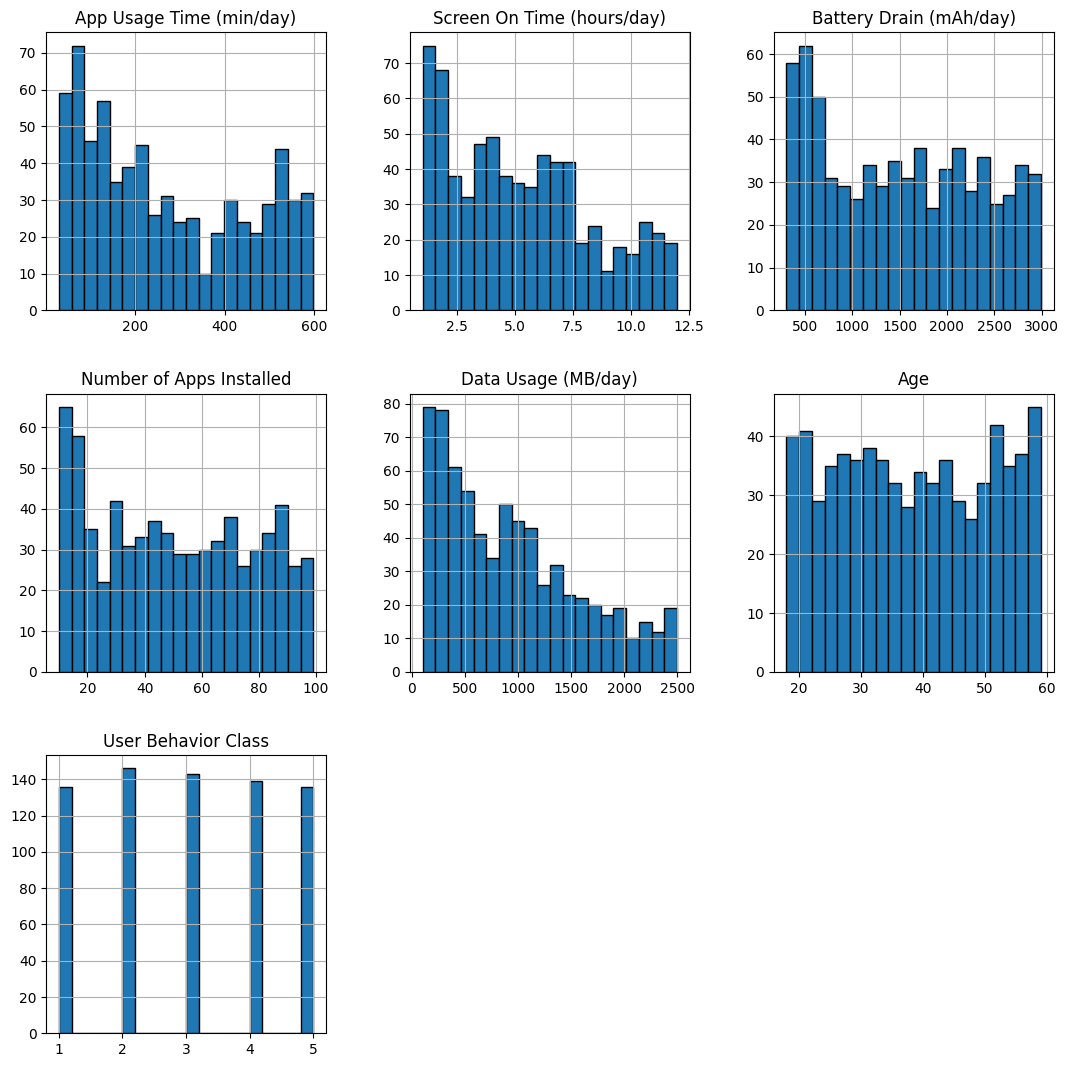

In [29]:
inp = input_data.drop(dframe.columns[0], axis=1)
inp.hist(bins=20, figsize=(13,13), edgecolor = 'black')
plt.show()

На данных гистограммах выбросы присутствуют во всех графиках, кроме графика класса поведения пользователя и графика возраста, при всем этом выбросов не так много

In [14]:
print(inp.isnull().sum())

App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
User Behavior Class           0
dtype: int64


В данном датасете нет пропущенных значений.
Определим матрицу корреляций для нашего датафрейма

In [22]:
matrix = inp.corr()

def correlation(cf):
    if (abs(cf) >= 0.7):
        return 'Сильная корреляция'
    elif (abs(cf) >= 0.5):
        return 'Средняя корреляция'
    elif (abs(cf) >= 0.3):
        return 'Слабая корреляция'
    else:
        return 'Корреляция отсутствует'

rslt = pd.DataFrame(index=matrix.index, columns=matrix.columns)

for i in range(len(matrix)):
    for k in range(len(matrix)):
        rslt.iloc[i,k] = correlation(matrix.iloc[i,k])

print(rslt)

                           App Usage Time (min/day)  \
App Usage Time (min/day)         Сильная корреляция   
Screen On Time (hours/day)       Сильная корреляция   
Battery Drain (mAh/day)          Сильная корреляция   
Number of Apps Installed         Сильная корреляция   
Data Usage (MB/day)              Сильная корреляция   
Age                          Корреляция отсутствует   
User Behavior Class              Сильная корреляция   

                           Screen On Time (hours/day) Battery Drain (mAh/day)  \
App Usage Time (min/day)           Сильная корреляция      Сильная корреляция   
Screen On Time (hours/day)         Сильная корреляция      Сильная корреляция   
Battery Drain (mAh/day)            Сильная корреляция      Сильная корреляция   
Number of Apps Installed           Сильная корреляция      Сильная корреляция   
Data Usage (MB/day)                Сильная корреляция      Сильная корреляция   
Age                            Корреляция отсутствует  Корреляция отсутст

Как мы можем видеть, в данном датасете очень много сильной корреляции, что свидетельствует о сильной взаимосвязи предоставленных данных.
Построим все возможные графики рассеивания для нашего датасета.

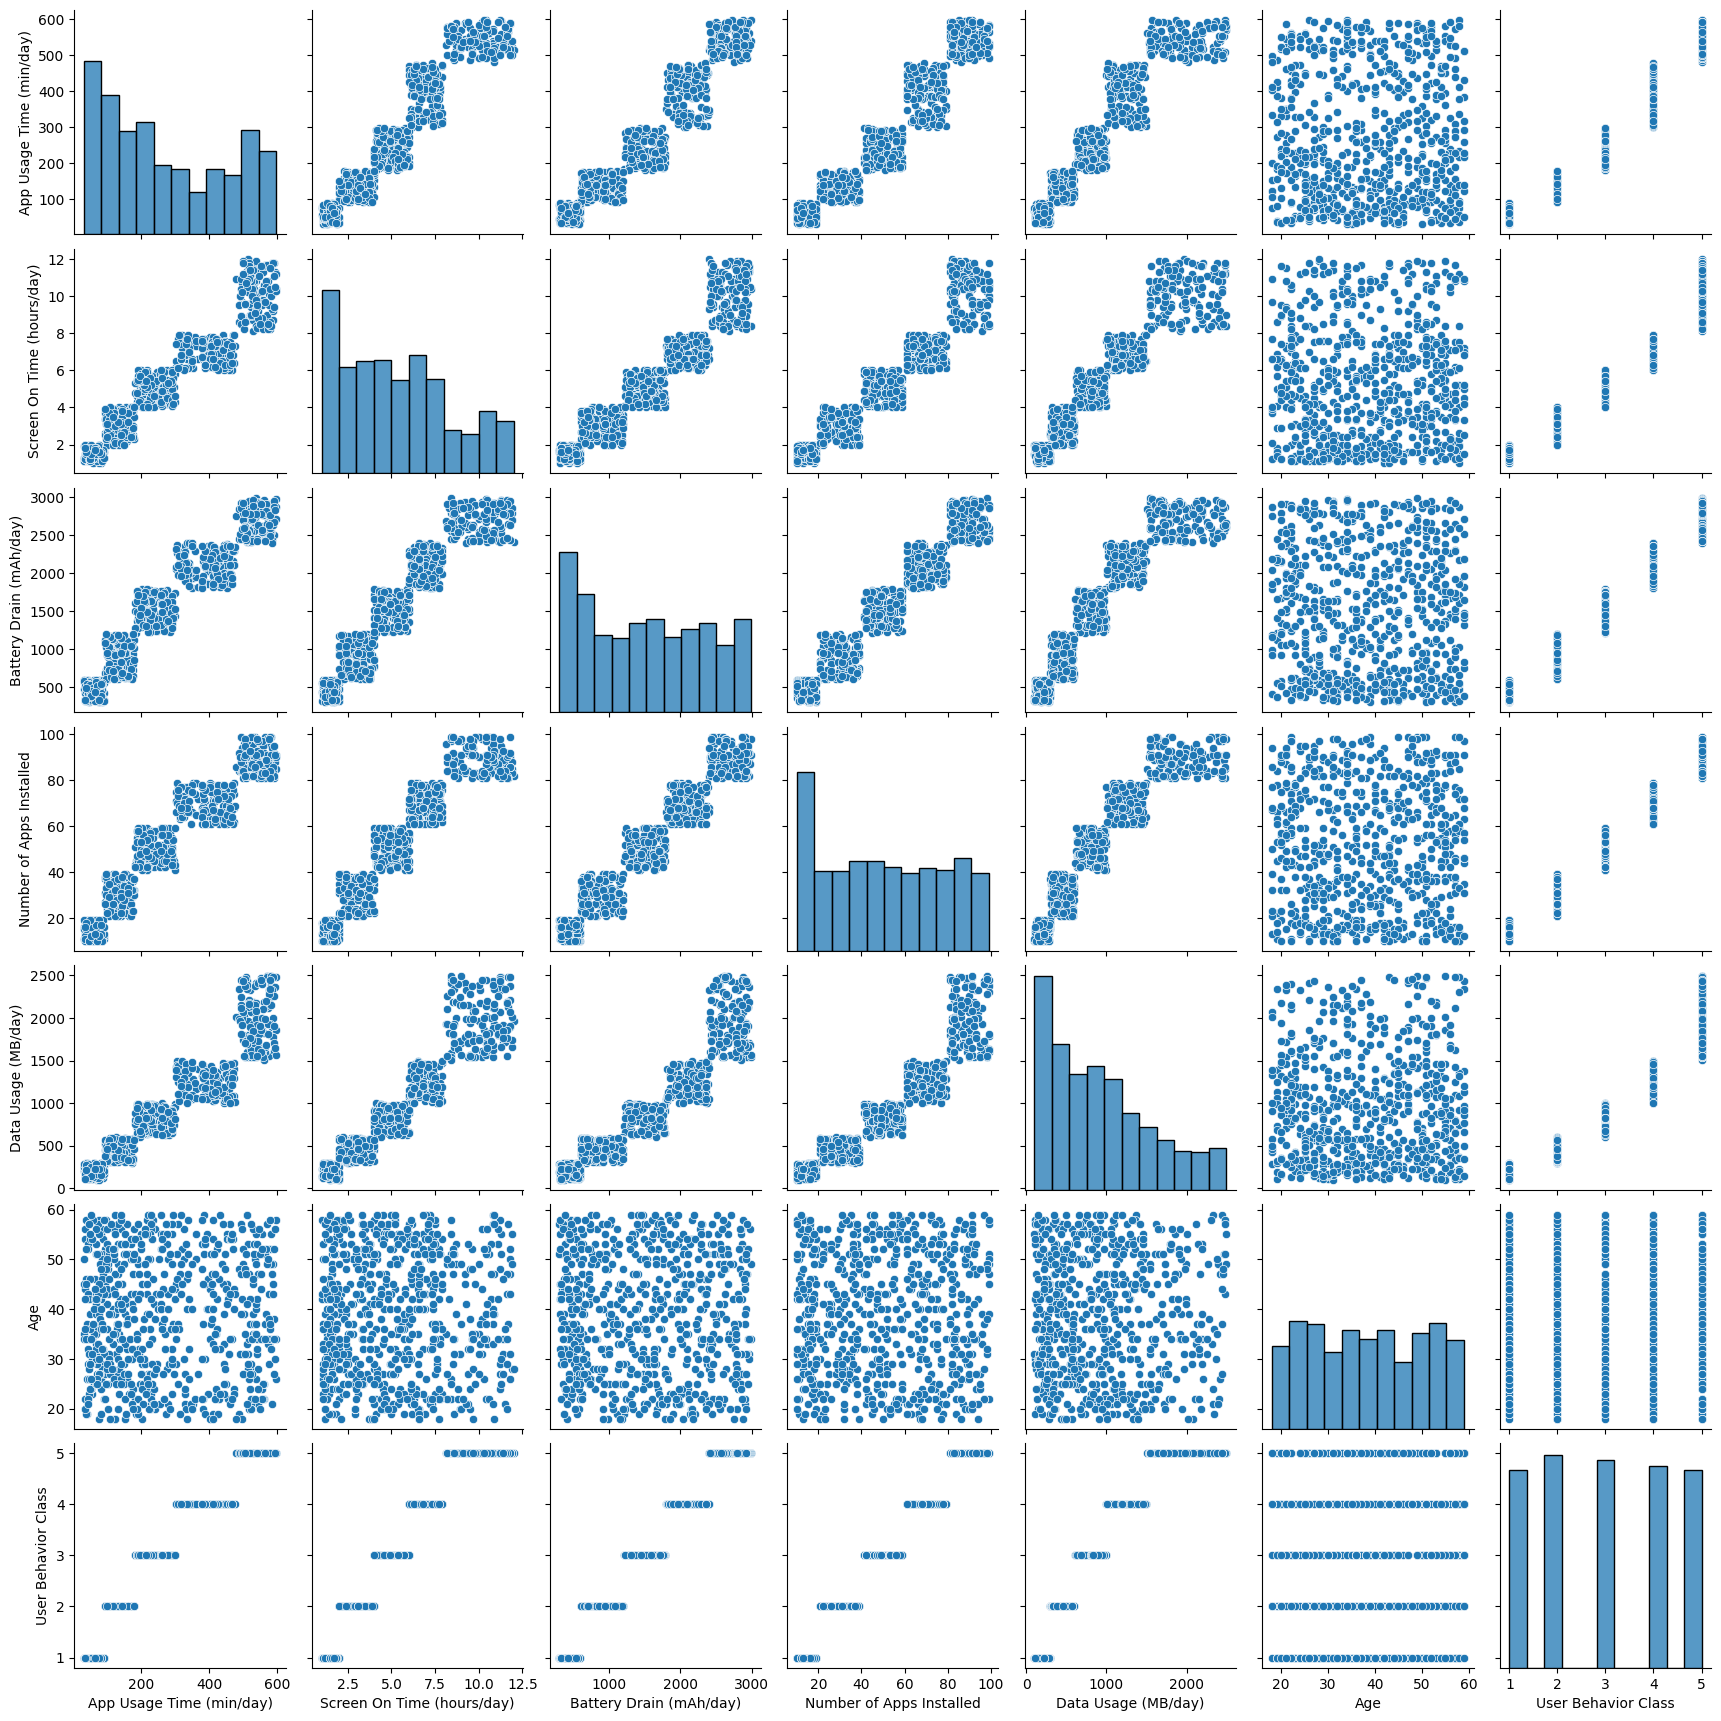

In [25]:
sb.pairplot(inp)
plt.show()

На основе анализа датасета можно сделать вывод о том, что в предоставленном наборе данных наблюдается очень сильная корреляция между данными, что можно увидеть как на матрице корреляции, так и на графиках рассеивания. Практически каждая колонка данных коррелирует с другой, также можно наблюдать высокую плотность данных. Единственная колонка, которая имеет малую корреляцию - это возраст, где корреляция практически отсутствует как таковая.